In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
# load data 

data_analisa = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/Data_project.csv")

In [4]:
# Split data category
category_column = ['Important places','Location','Floor'] # column used
category_column

['Important places', 'Location', 'Floor']

In [5]:
# split data train category
numeric_col_train = list(set(data_analisa.columns) - set(category_column))

In [6]:
# split data valid category
numeric_col_valid = list(set(data_analisa.columns) - set(category_column))

In [7]:
# split data test category
numeric_col_test = list(set(data_analisa.columns) - set(category_column))

In [8]:
def splitNumCat(data, num_col, cat_col):
    """"
    Function for split category between numeric
    data_num = input data split numeric
    data_cat = input data split category
    """
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat

In [9]:
# call function X_train
X_train_num, X_train_cat = splitNumCat(data = data_analisa,
                                       num_col = numeric_col_train,
                                       cat_col = category_column)

(X_train_num.shape),(X_train_cat.shape) 

((1960, 9), (1960, 3))

###  OHE

In [10]:
# Encoder for model

# OHE from data_analisa
X_train = pd.get_dummies(X_train_cat)

### Concat Data

In [11]:
# concat data X_train
X_train_concat = pd.concat([X_train_num, X_train],
                           axis = 1)

(X_train_concat.shape)

(1960, 17)

In [12]:
X_train_concat.rename(columns = {'Floor_Lantai 2':'Floor_Lantai_2','Floor_Lantai 3' : 'Floor_Lantai_3', 'Important places_Tempat Penting'
                                : 'Important_places','Important places_Tidak Penting' : 'No_important_places'}, inplace = True)

In [13]:
X_train_concat.columns

Index(['Installment_BNI', 'Garage', 'Price', 'Bedroom', 'Building',
       'Installment_BCA', 'Land', 'Installment_Mandiri', 'Bathroom',
       'Important_places', 'No_important_places', 'Location_Kecamatan',
       'Location_Kelurahan', 'Location_Kota', 'Floor_Lantai_2',
       'Floor_Lantai_3', 'Floor_Lantai_1'],
      dtype='object')

# Feature Engineering

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

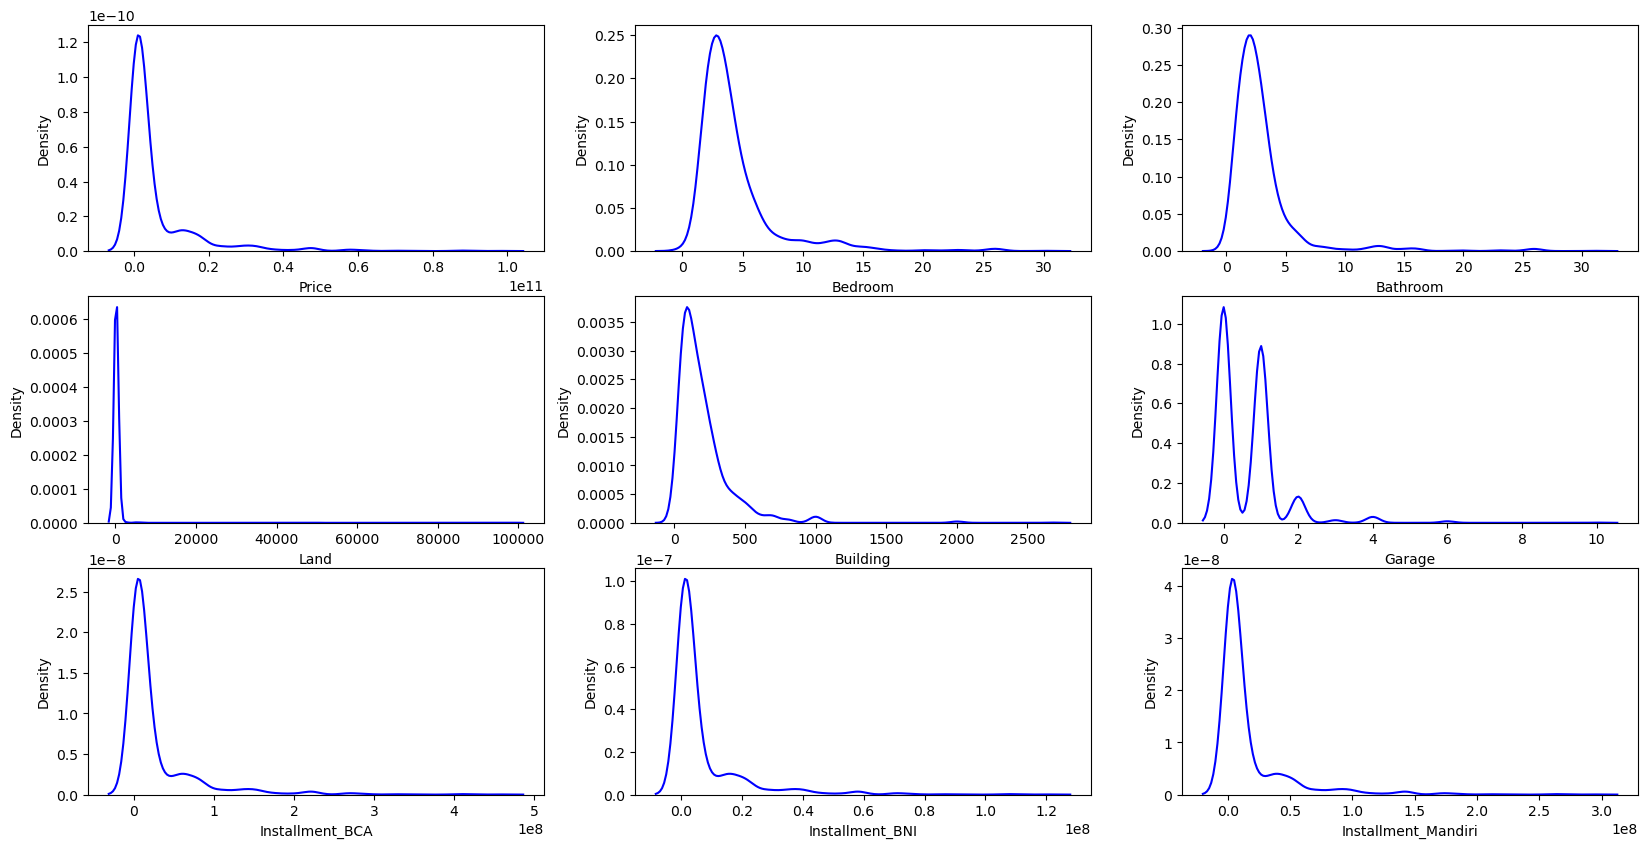

In [14]:
# check with visualization before use feature engineering
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=data_analisa, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=data_analisa, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=data_analisa, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=data_analisa, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=data_analisa, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=data_analisa, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=data_analisa, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=data_analisa, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=data_analisa, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

## Scaling

In [15]:
def standardizeData(data, scaler = None):
    """
    This function used for convert data to
    standaritation scaler
    """
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler

In [16]:
def Minmax(data, minmax = None):
    """
    This function used for convert data to
    Minmax scaler
    """
    if minmax == None:
        # Buat & Fit scaler
        minmax = MinMaxScaler()
        minmax.fit(data)

    # Tranform data
    data_minmax = minmax.transform(data)
    data_minmax = pd.DataFrame(data_minmax,
                               index = data.index,
                               columns = data.columns)
    
    return data_minmax, minmax

In [17]:
def normalizer(data):
    """
    This function used for convert data to
    Normal scaler
    """
    # make scaler
    normal = Normalizer()

    # normalize the data (fit)
    normalized_data = normal.fit_transform(data)
    normalized_data = pd.DataFrame(normalized_data,
                           index = data.index,
                           columns = data.columns)

    return normalized_data, normal

In [18]:
# Make Normal X_train
X_train_normal, normal = normalizer(data = X_train_concat)

In [19]:
# Make Minmax X_train
X_train_minmax, minmax = Minmax(data = X_train_concat)

In [20]:
# Make standaritation X_train
X_train_standart, scaler = standardizeData(data = X_train_concat)

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

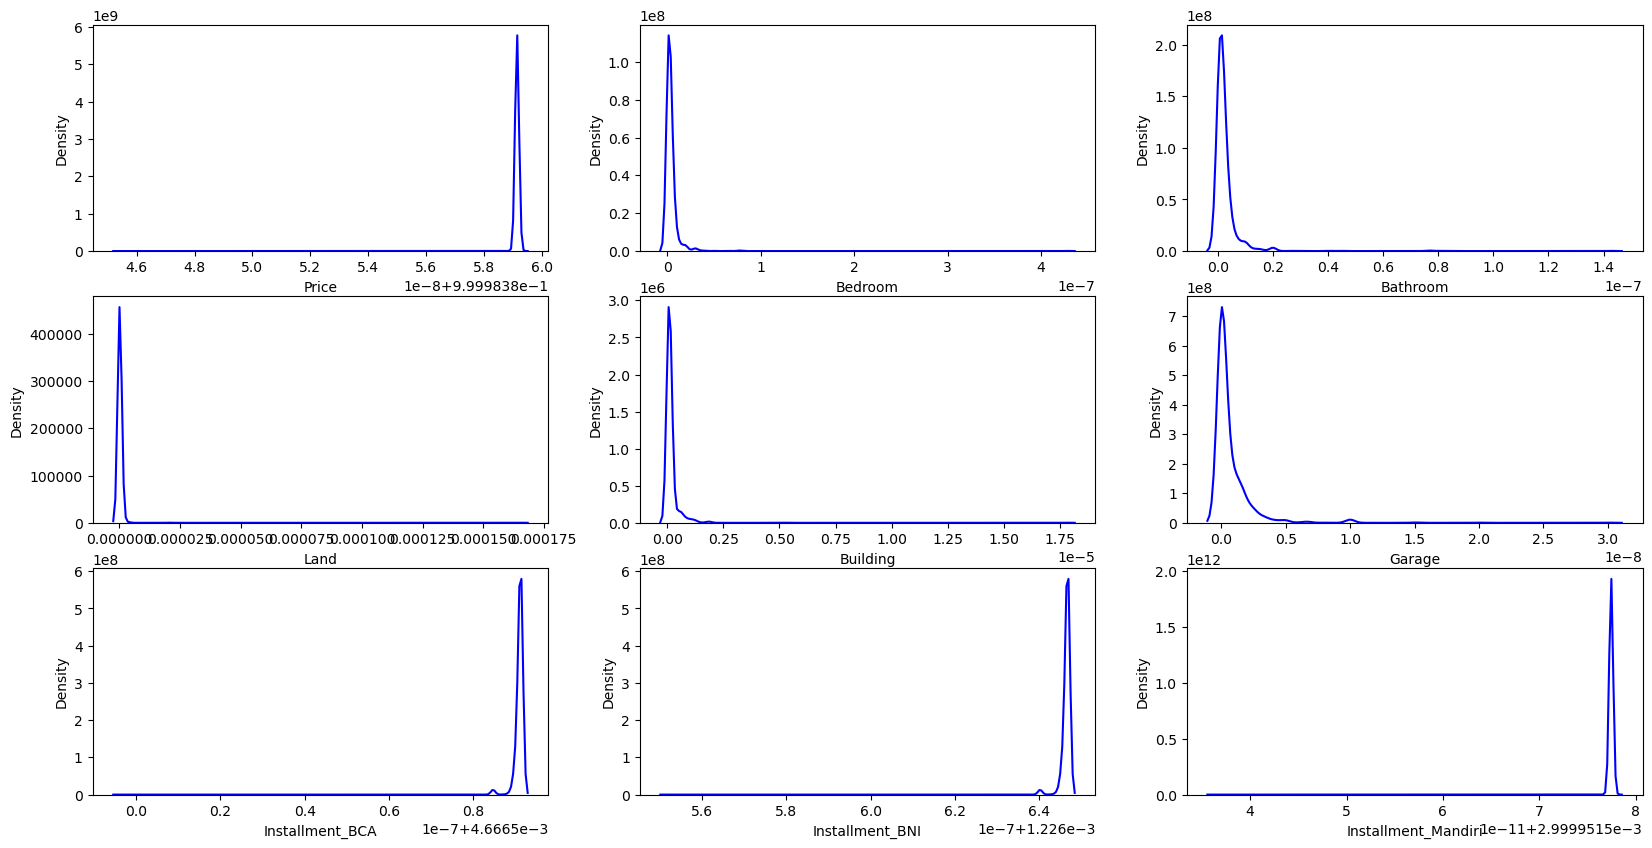

In [21]:
# check with visualization after scaling normal
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=X_train_normal, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=X_train_normal, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=X_train_normal, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=X_train_normal, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=X_train_normal, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=X_train_normal, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=X_train_normal, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=X_train_normal, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=X_train_normal, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

## Dimensionality Reduction

In [22]:
def dimension_pca(data):
    """
    This function used for convert data to
    Dimensionality reduction PCA
    """
    pca = PCA(n_components=17)

    # Fit the PCA model to the data
    pca.fit(data)

    # Transform the data using the fitted PCA model
    pca_data = pca.transform(data)
    pca_data = pd.DataFrame(pca_data,
                       index = data.index,
                       columns = data.columns)
    
    return pca_data, pca

In [23]:
# Make pca X_train
X_train_pca, pca = dimension_pca(data = X_train_concat)

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

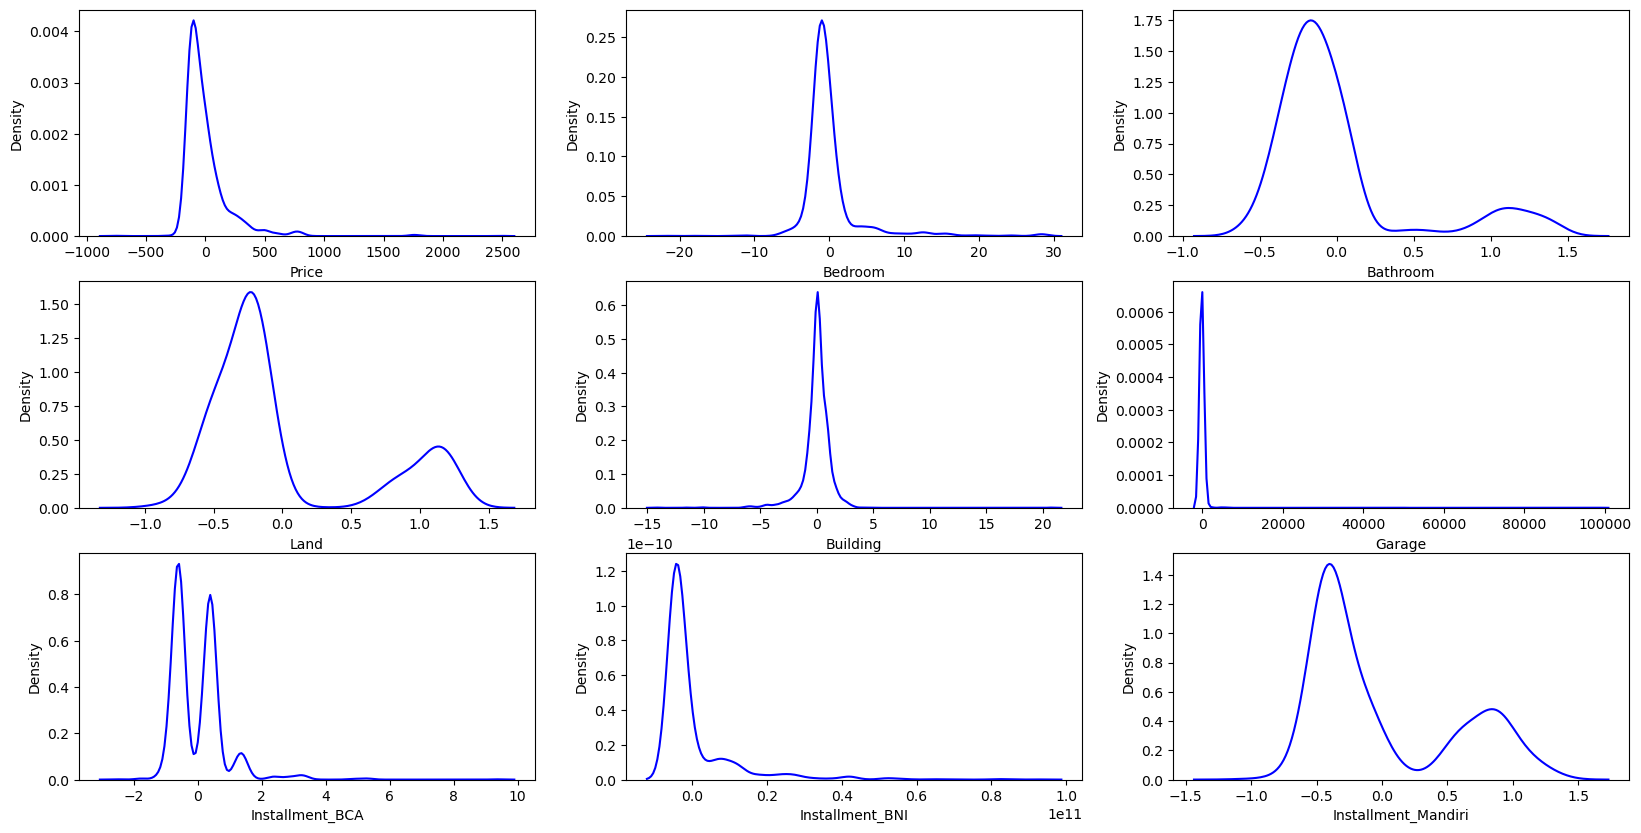

In [24]:
# check with visualization after reduction PCA
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=X_train_pca, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=X_train_pca, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=X_train_pca, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=X_train_pca, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=X_train_pca, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=X_train_pca, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=X_train_pca, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=X_train_pca, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=X_train_pca, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

# Transformation

In [25]:
#create log-transformed data
def log(data) :
    """
    This function used for convert data to
    Transformation log
    """
    data_log = np.log1p(data)
    data_log = pd.DataFrame(data_log,
                       index = data.index,
                       columns = data.columns)
    return data_log

In [26]:
#create log-transformed data
def yeo(data) :
    """
    This function used for convert data to
    PowerTransformation yeo-johnson
    """    
    pt = PowerTransformer(method='yeo-johnson')
    data_yeo = pt.fit_transform(data)
    data_yeo = pd.DataFrame(data_yeo,
                   index = data.index,
                   columns = data.columns)
    return data_yeo

In [27]:
# Make yeo X_train
X_train_yeo = yeo(data = X_train_concat)

In [28]:
# Make log X_train
X_train_log = log(data = X_train_concat)

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

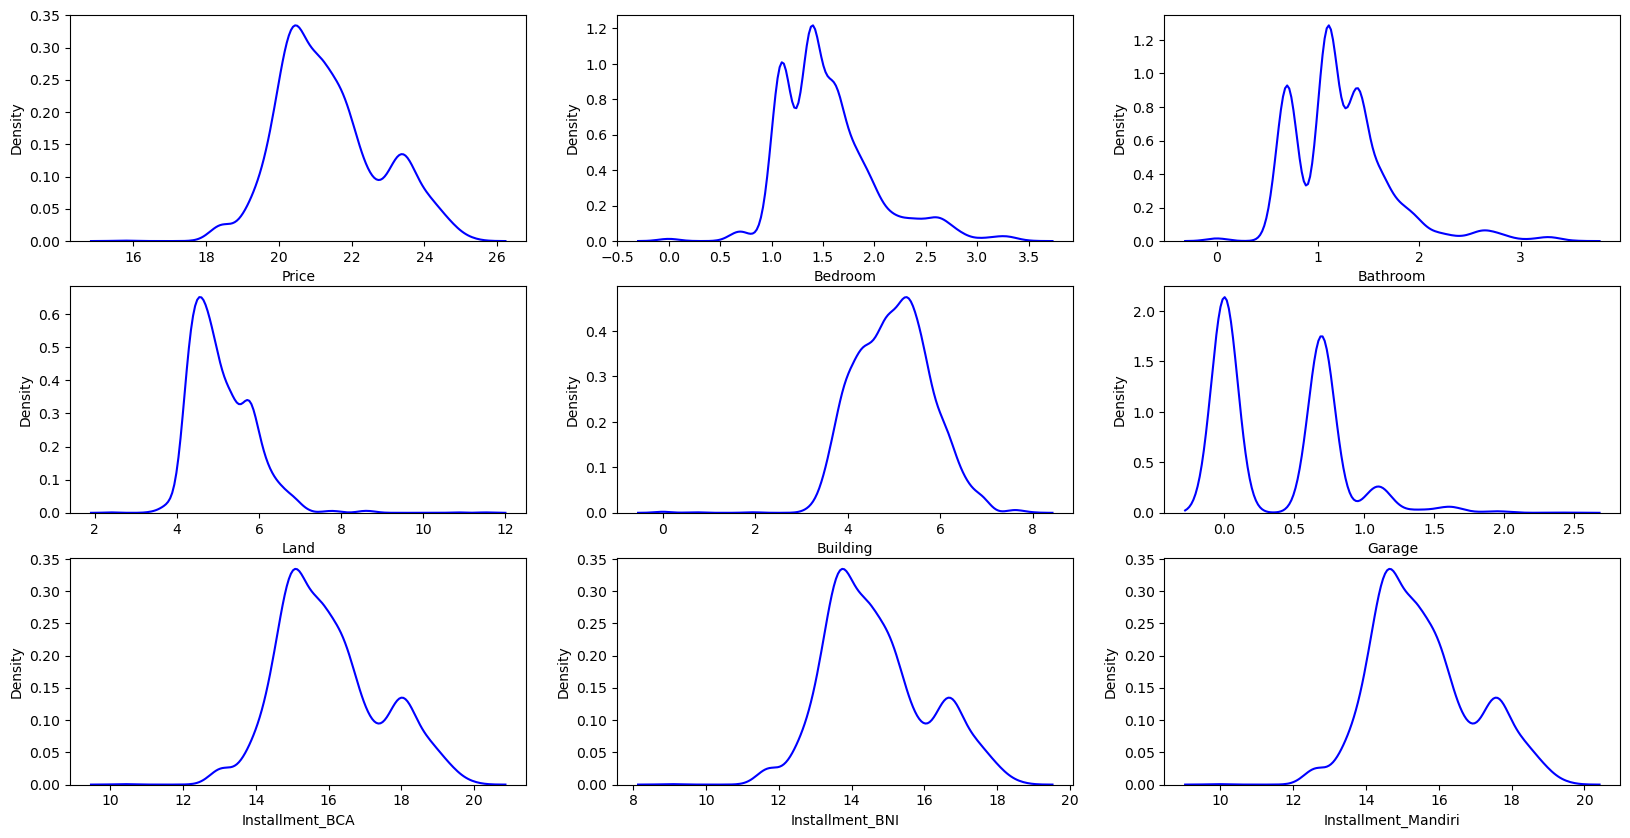

In [29]:
# check with visualization after transform log
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=X_train_log, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=X_train_log, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=X_train_log, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=X_train_log, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=X_train_log, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=X_train_log, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=X_train_log, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=X_train_log, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=X_train_log, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

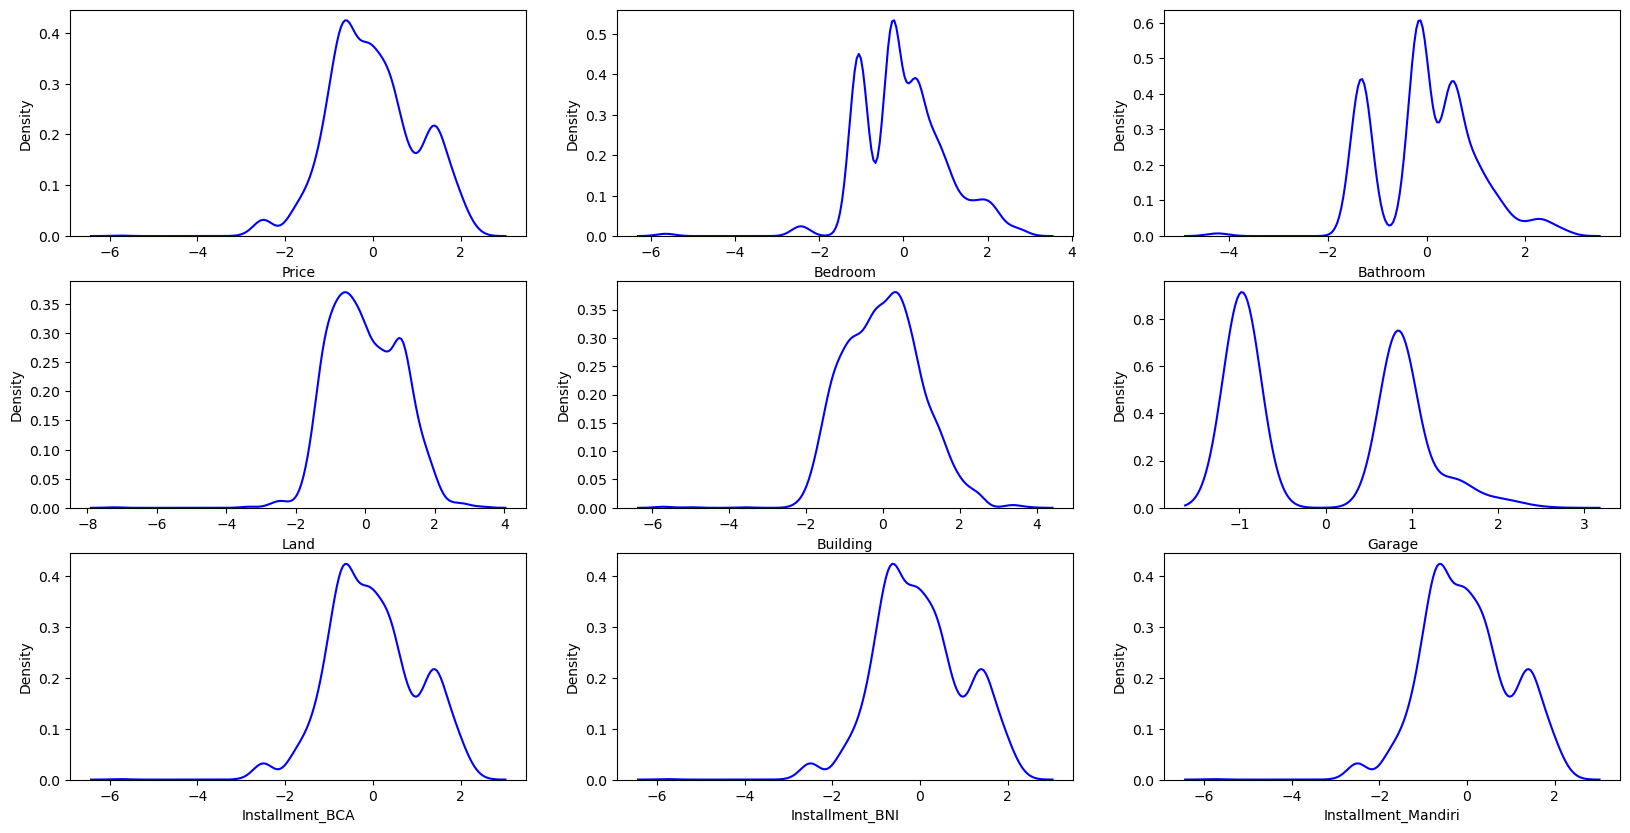

In [30]:
# check with visualization after transform yeo
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=X_train_yeo, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=X_train_yeo, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=X_train_yeo, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=X_train_yeo, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=X_train_yeo, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=X_train_yeo, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=X_train_yeo, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=X_train_yeo, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=X_train_yeo, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

# Combine Feature Engineering

In [31]:
# Transform VS Scaling  

# Make Normal X_train_yeo
train_nomr_yeo, normal = normalizer(data = X_train_yeo)

# Make Normal X_train_log
train_norm_log, normal = normalizer(data = X_train_log)

# Make standart X_train_yeo
train_stand_log, scaler = standardizeData(data = X_train_log)

# Make standart X_train_log
train_stand_yeo, scaler = standardizeData(data = X_train_yeo)

# Make minmax X_train_yeo
train_minmax_log, minmax = Minmax(data = X_train_log)

# Make minmax X_train_log
train_minmax_yeo, minmax = Minmax(data = X_train_yeo)

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

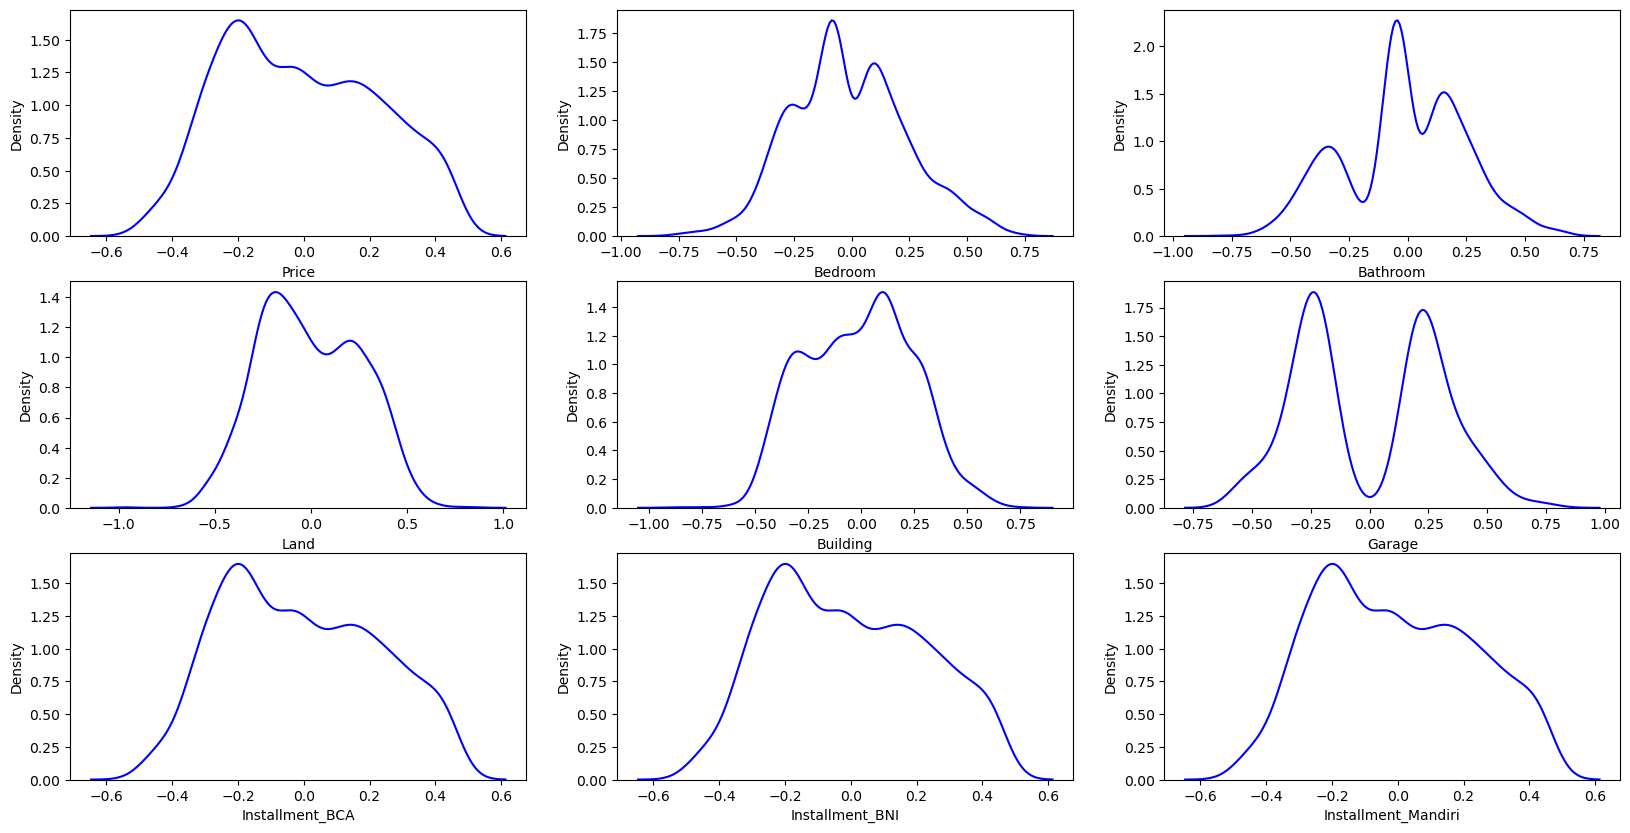

In [32]:
# check with visualization after combine yeo vs norm
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=train_nomr_yeo, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=train_nomr_yeo, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=train_nomr_yeo, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=train_nomr_yeo, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=train_nomr_yeo, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=train_nomr_yeo, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=train_nomr_yeo, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=train_nomr_yeo, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=train_nomr_yeo, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

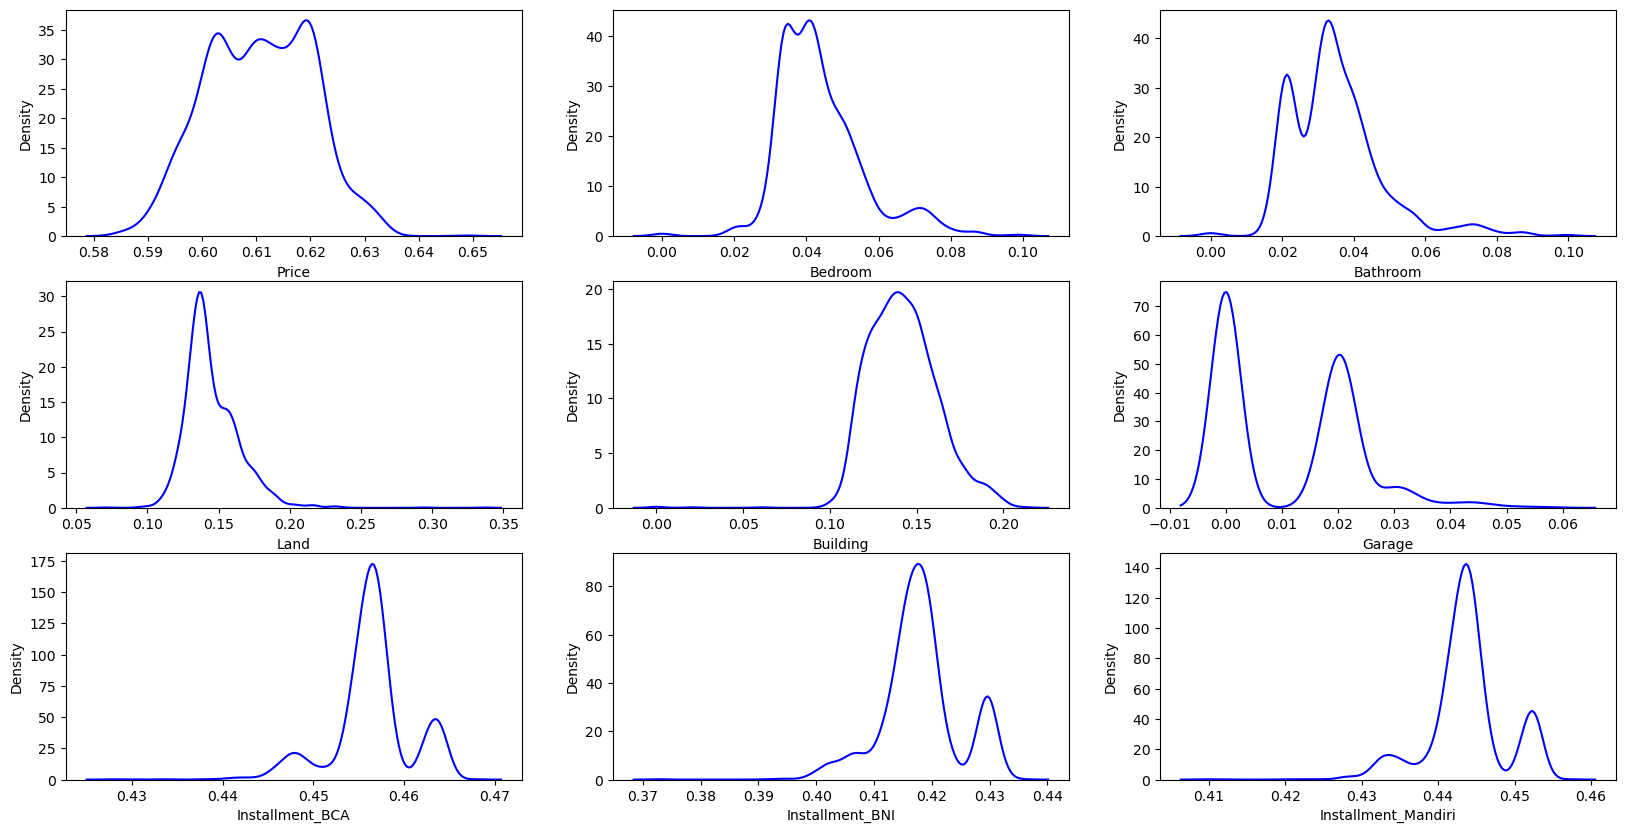

In [33]:
# check with visualization after combine log vs norm
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=train_norm_log, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=train_norm_log, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=train_norm_log, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=train_norm_log, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=train_norm_log, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=train_norm_log, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=train_norm_log, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=train_norm_log, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=train_norm_log, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

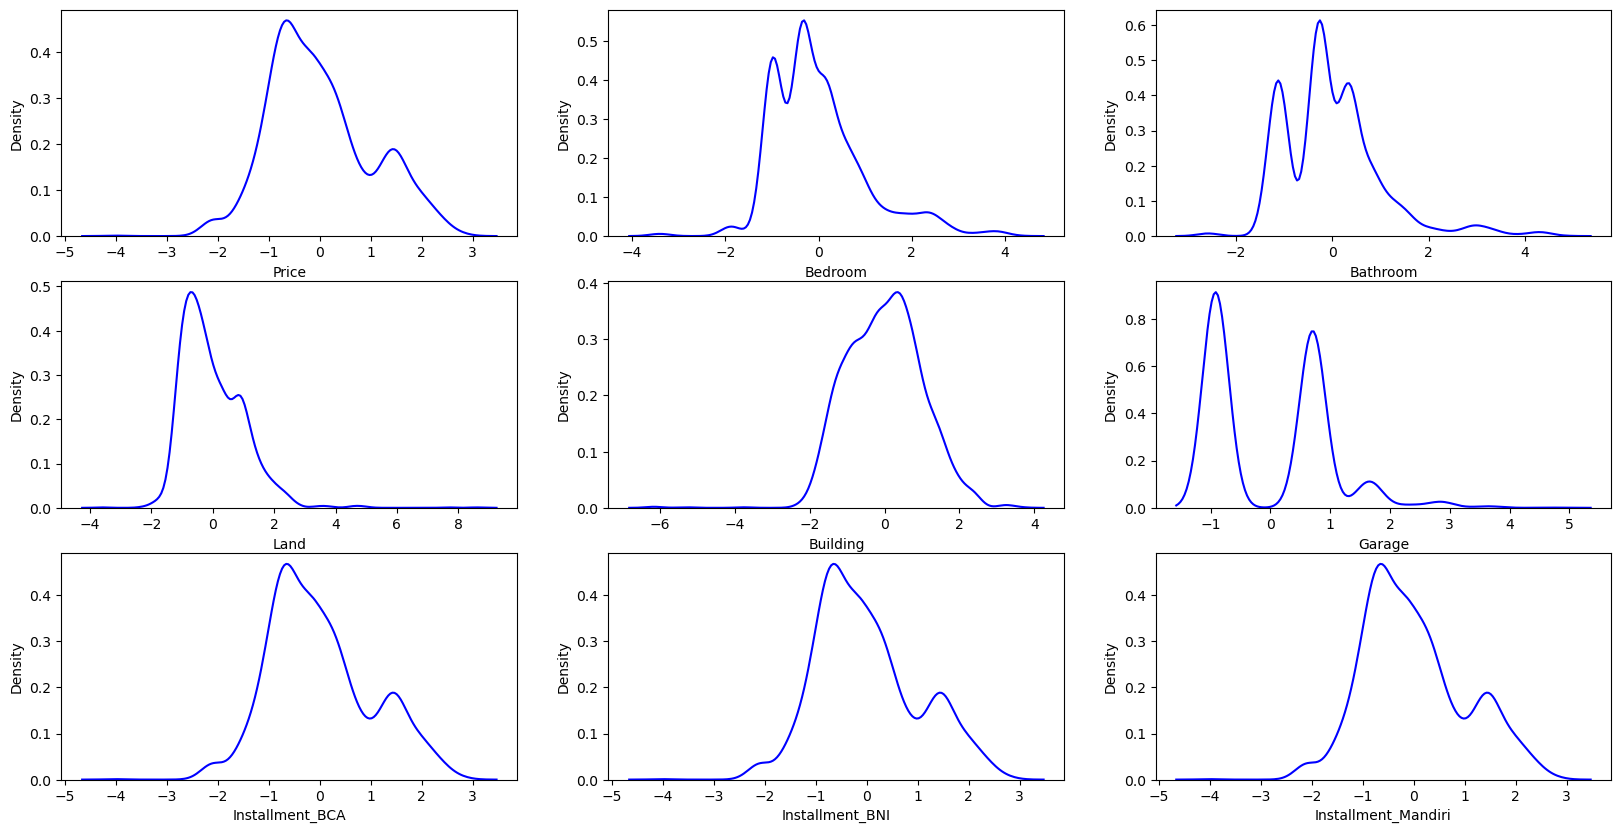

In [34]:
# check with visualization after combine log vs standart
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=train_stand_log, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=train_stand_log, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=train_stand_log, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=train_stand_log, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=train_stand_log, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=train_stand_log, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=train_stand_log, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=train_stand_log, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=train_stand_log, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

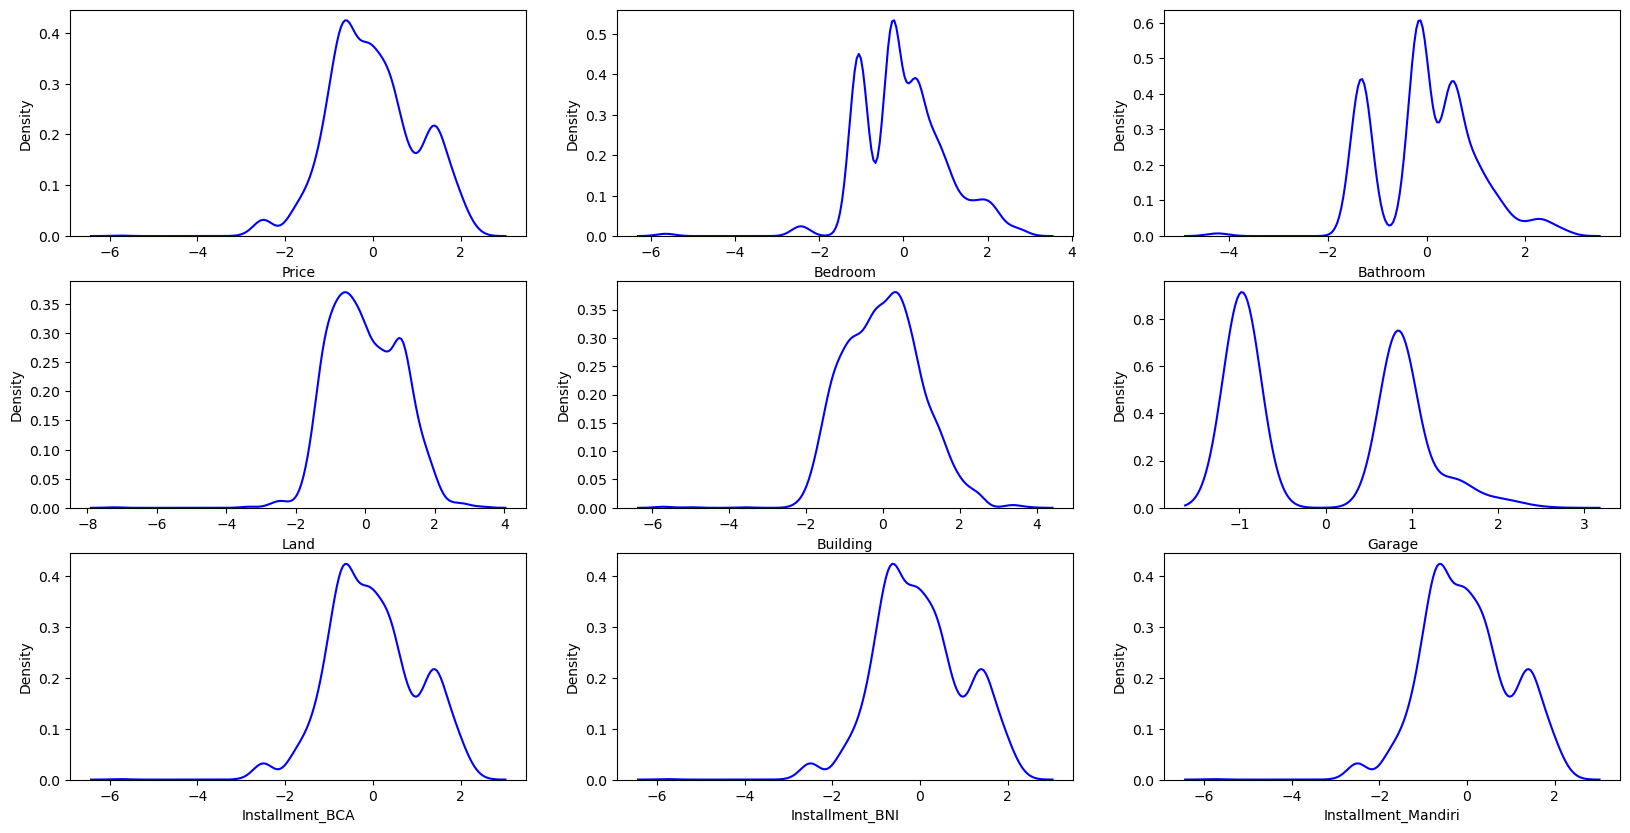

In [35]:
# check with visualization after combine yeo vs standart
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=train_stand_yeo, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=train_stand_yeo, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=train_stand_yeo, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=train_stand_yeo, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=train_stand_yeo, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=train_stand_yeo, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=train_stand_yeo, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=train_stand_yeo, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=train_stand_yeo, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

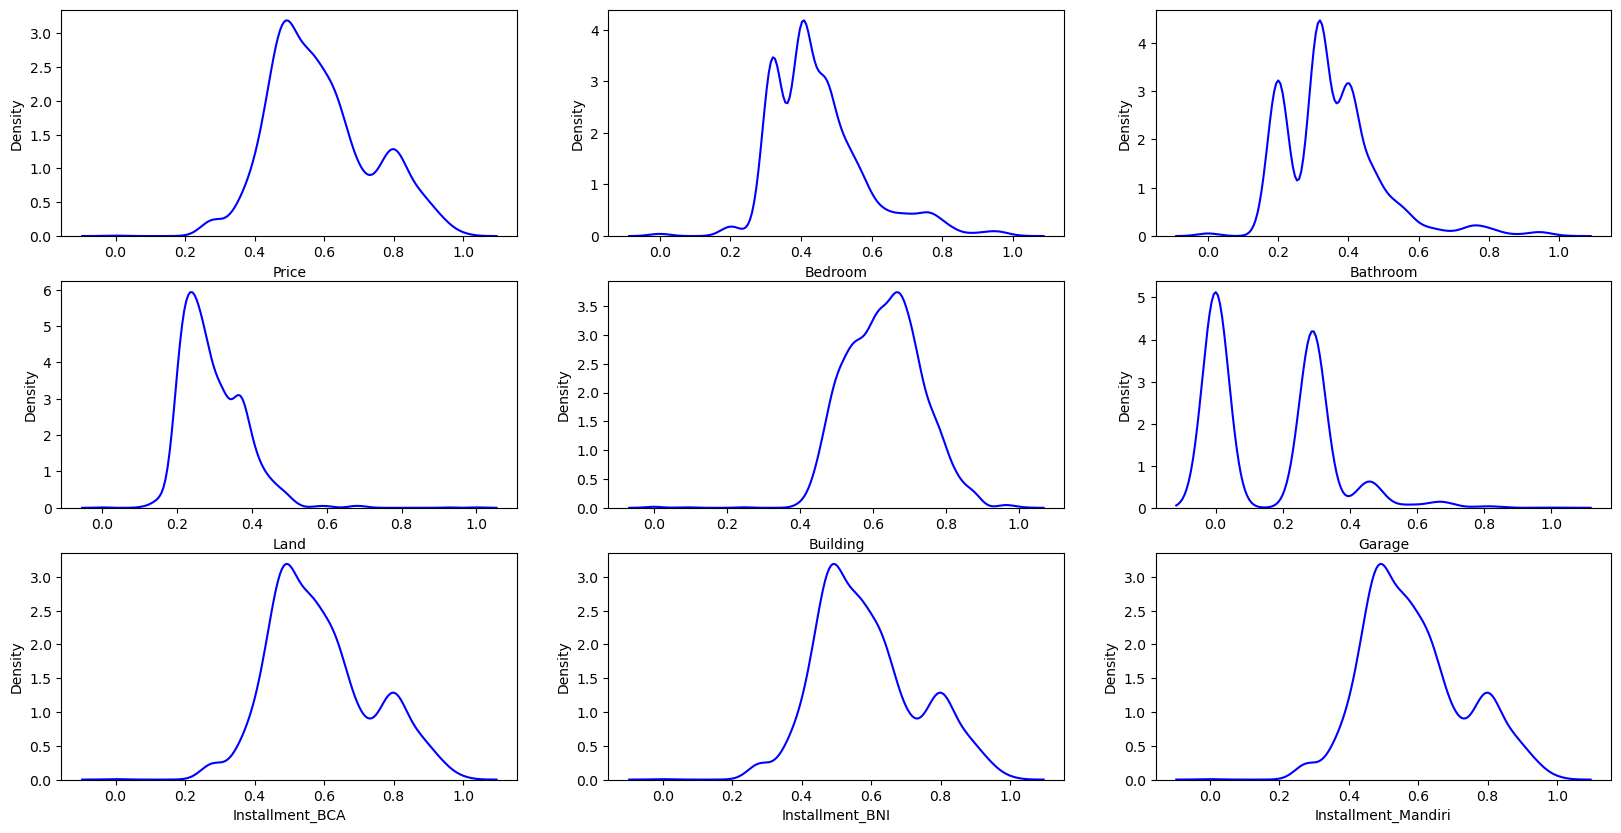

In [36]:
# check with visualization after combine log vs minmax
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=train_minmax_log, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=train_minmax_log, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=train_minmax_log, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=train_minmax_log, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=train_minmax_log, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=train_minmax_log, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=train_minmax_log, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=train_minmax_log, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=train_minmax_log, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

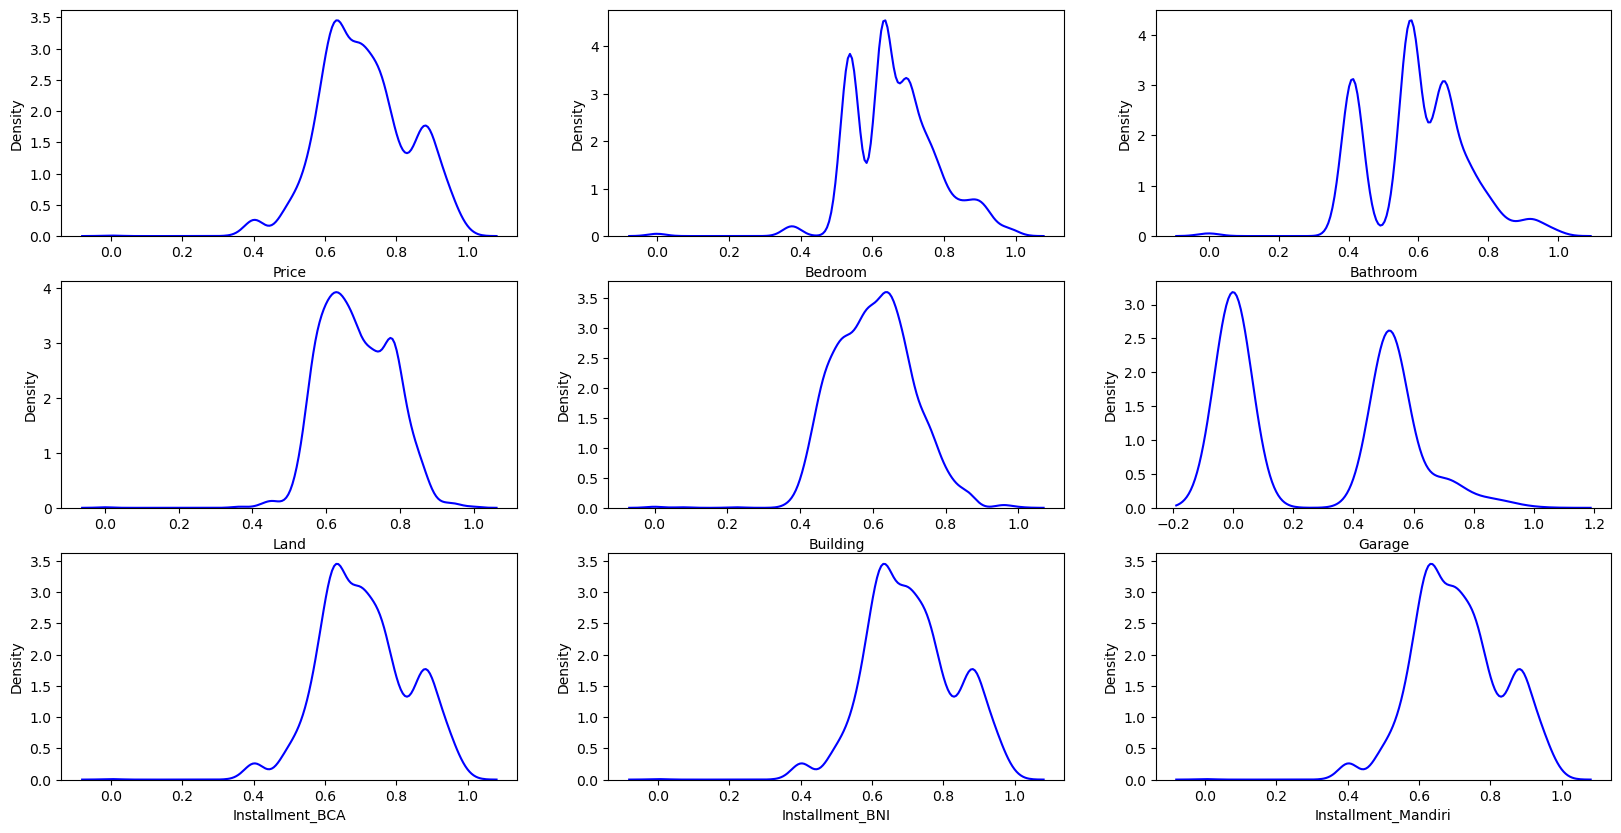

In [37]:
# check with visualization after combine yeo vs minmax
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=train_minmax_yeo, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=train_minmax_yeo, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=train_minmax_yeo, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=train_minmax_yeo, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=train_minmax_yeo, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=train_minmax_yeo, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=train_minmax_yeo, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=train_minmax_yeo, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=train_minmax_yeo, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

In [38]:
def normalizer():
    """
    This function used for convert data to
    Normal scaler
    """
    # make scaler
    normal = Normalizer()

    # normalize the data (fit)
    normalized_data = normal.fit_transform(X_train_concat)
    normalized_data = pd.DataFrame(normalized_data,
                           index = X_train_concat.index,
                           columns = X_train_concat.columns)
    print(normalized_data)
    return normalized_data, normal

In [39]:
X_train_normal.median()

Installment_BNI        1.226647e-03
Garage                 0.000000e+00
Price                  9.999839e-01
Bedroom                2.352903e-09
Building               8.593611e-08
Installment_BCA        4.666591e-03
Land                   9.655513e-08
Installment_Mandiri    2.999952e-03
Bathroom               1.428548e-09
Important_places       0.000000e+00
No_important_places    3.999935e-10
Location_Kecamatan     3.030254e-10
Location_Kelurahan     0.000000e+00
Location_Kota          0.000000e+00
Floor_Lantai_2         0.000000e+00
Floor_Lantai_3         0.000000e+00
Floor_Lantai_1         5.555466e-10
dtype: float64

In [40]:
# save fitur

joblib.dump(X_train_standart, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_standart.csv")
joblib.dump(X_train_normal, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_normal.csv")
joblib.dump(X_train_minmax, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_minmax.csv")
joblib.dump(X_train_pca, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_pca.csv")
joblib.dump(X_train_yeo, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_yeo.csv")
joblib.dump(X_train_log, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_log.csv")
joblib.dump(train_nomr_yeo, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_norm_yeo.csv")
joblib.dump(train_norm_log, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_norm_log.csv")
joblib.dump(train_stand_log, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_stand_log.csv")
joblib.dump(train_stand_yeo, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_stand_yeo.csv")
joblib.dump(train_minmax_log, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_minmax_log.csv")
joblib.dump(train_minmax_yeo, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_minmax_yeo.csv")

['D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_minmax_yeo.csv']

In [41]:
# save data
X_train_normal.to_csv('Data_test.csv', index=False)